In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
session.query(Measurement.date).\
    filter(Measurement.date > '2010-01-01').\
    order_by(Measurement.date).all()

[('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-04'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-05'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-10'),
 ('2010-01-10'),
 ('2010-01-10'),
 ('2010-01-10'

In [14]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [15]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [16]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [17]:
query_date1 = dt.date(2017, 8, 23) - dt.timedelta(days=0)
print("Query Date1: ", query_date1)

Query Date1:  2017-08-23


In [18]:
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= query_date1).\
    filter(Measurement.date >= query_date).all()
 
precipitation_df = pd.DataFrame(precipitation)
precipitation_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [19]:
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:

precipitation_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [21]:
precipitation_df.sort_values('date', ascending = True, inplace = True)

precipitation_df.set_index('date', inplace = True)

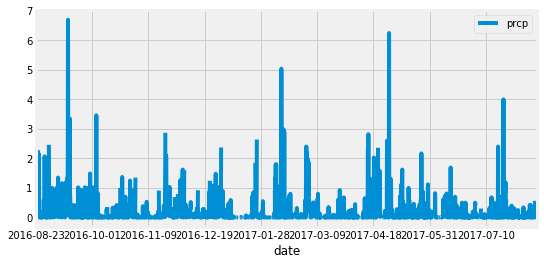

In [39]:
ax = precipitation_df.plot(figsize=(8,4))
ax.set_xlabel('date')
plt.show()

In [24]:
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [25]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations available.".format(locations))

There are 9 stations available.


In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_station=engine.execute("SELECT station, count(station) FROM measurement GROUP BY station ORDER BY count (station) DESC").fetchall()

most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temperature=[]

stationID = most_active_station[0][0]

#query for station name
stationName = (session.query(Station.name)
                      .filter_by(station = stationID))
stationName = stationName[0][0]


#query for highest temperature
highestTemp = (session.query(Measurement.tobs)
                      .filter(Measurement.station == stationID)
                      .order_by(Measurement.tobs.desc())
                      .first())
highestTemp = highestTemp[0]
temperature.append(highestTemp)


#query for lowest temperature
lowestTemp = (session.query(Measurement.tobs)
                     .filter(Measurement.station == stationID)
                     .order_by(Measurement.tobs.asc())
                     .first())
lowestTemp = lowestTemp[0]
temperature.append(lowestTemp)


#query for average temperature
avgTemp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == stationID))
avgTemp = avgTemp[0][0]
temperature.append(avgTemp)


temperature

[85.0, 54.0, 71.66378066378067]

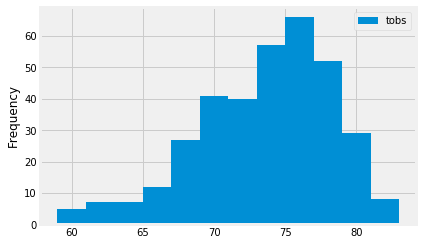

In [42]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperatureData = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > query_date)
                   .filter(Measurement.station == stationID)
                   .order_by(Measurement.date)
                   .all())

#convert query object to data frame
temperatureTable = pd.DataFrame(temperatureData)
temperatureTable = temperatureTable.set_index('date')

#sory by date
temperatureTable = temperatureTable.sort_index(ascending=True)

#histogram plot with pandas
temperatureTable.plot(kind='hist', bins=12)

![precipitation](Images/station-histogram.png)

In [73]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[('2012-02-29', 62.0, 69.57142857142857, 74.0)]


In [80]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
data = calc_temps('2017-08-01', '2017-08-06')
data

[('2017-08-02', 72.0, 79.04166666666667, 83.0)]

In [84]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_avg_temp = pd.DataFrame(data = data, columns=["date", "tmin", "tavg", "tmax"])
trip_avg_temp = trip_avg_temp.set_index('date', drop=True)




In [89]:

#Create variables for my plot
trip_date = trip_avg_temp.index.values
trip_min_temp = trip_avg_temp ["tmin"]
trip_avg_temp = trip_avg_temp ["tavg"]


KeyError: 'tmin'

In [ ]:
plt.clf()
plt.figure(figsize=[10, 6])

trip_avg = plt.bar(trip_date, trip_avg_temp, yerr=15, label='Error bar is Min to Max Temp')
#pmax = plt.bar(p3_date, p3_tmax)
plt.ylabel('Temp (F)')
plt.xlabel('Trip Dates')
plt.title('Trip Avg Temp by Dates')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
